# Reshaping the ComStock outputs to DR-path inputs
NOTE: have to run this from the Windows side in order to access Google Drive.
Must be run AFTER extracting the ResStock runs, since this writes to the same folders and extends the cluster summary file.


In [1]:
import pandas as pd
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from utils.column_mapping import map_columns

In [2]:
indir = r"G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ComStock\FullData(12 07 2020 from Andrew)"
insubdir='timeseries_unweighted/building_load_shapes'
indir2 = os.path.join(indir,'Materials_for_DRPath_Inputs_generation')
outdir = r"C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock"
resstockrun='ResStockFullRun20200617'
grossloadfile = os.path.join('Grossload','Gross_load_{s}_scenario_0_VS_1_2016.csv')
wyear = '2016AMY'
year=2016
upgrade_map={0:'baseline',
             1:'equipment_only',
             2:'controls_only',
             3:'envelope_only',
             4:'envelope_plus_controls',
             5:'envelope_plus_controls_plus_equipment'}
site_size_map = {
    'FullServiceRestaurant':'large',
    'RetailStandalone':'large', 
    'RetailStripmall':'small', 
    'SecondarySchool':'large',
    'SmallHotel':'small', 
    'SmallOffice':'small', 
    'Hospital':'noDR', 
    'LargeHotel':'large',
    'LargeOffice':'large', 
    'MediumOffice':'large', 
    'Outpatient':'noDR', 
    'PrimarySchool':'small',
    'QuickServiceRestaurant':'small', 
    'Warehouse':'large',
}

In [3]:
region='ERCT'
region_state_map = {'CAMX':'CA', 'ERCT':'TX', 'NENG':'NE'}
state = region_state_map[region]
region_selector={
    'CAMX':['CA', 'NV'],
    'ERCT':['TX', 'LA', 'AZ','OK','AR', 'NM'],
    'NENG':['CT','RI','MA','VT','NH','ME','NY']
}

states = region_selector[region]
sf0 = pd.read_csv(os.path.join(indir2,'scalingfactor',
                               'ScalingFactor(FullRun_ComStock_Data)_'+
                               state+'_2016.csv'))
sf0.loc[sf0['epw'].str.slice(4,6).isin(states)]

epw location              unit_type  \
0     USA_LA_Fort.Polk.Army.722390_2016.epw       2A  FullServiceRestaurant   
1     USA_LA_Fort.Polk.Army.722390_2016.epw       2A          PrimarySchool   
2     USA_LA_Fort.Polk.Army.722390_2016.epw       2A        SecondarySchool   
3     USA_LA_Fort.Polk.Army.722390_2016.epw       3A  FullServiceRestaurant   
4     USA_LA_Fort.Polk.Army.722390_2016.epw       3A          PrimarySchool   
...                                     ...      ...                    ...   
1329   USA_TX_Hutchinson.Co.723635_2016.epw       4B        RetailStripmall   
1330   USA_TX_Hutchinson.Co.723635_2016.epw       4B        SecondarySchool   
1331   USA_TX_Hutchinson.Co.723635_2016.epw       4B             SmallHotel   
1332   USA_TX_Hutchinson.Co.723635_2016.epw       4B            SmallOffice   
1333   USA_TX_Hutchinson.Co.723635_2016.epw       4B              Warehouse   

      upgrade  Units_count  Scale_BuildingTot_area  Scale_EIARefer  \
0           0            0                0.000000        0.792549   
1           0            0                0.000000        0.792549   
2           0            0                0.000000        0.792549   
3           0            0                0.000000        0.792549   
4           0            0                0.000000        0.792549   
...       ...          ...                     ...             ...   
1329        0            0                0.000000        0.792549   
1330        0            0                0.000000        0.792549   
1331        0            0                0.000000        0.792549   
1332        0         3853              224.497226        0.792549   
1333        0            0                0.000000        0.792549   

      Scale_UsableRatio  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
1329                  1  
1330                  1  
1331                  1  
1332                  1  
1333                  1  

[795 rows x 8 columns]

In [4]:
summ_all = pd.read_csv(os.path.join(indir,'brief_summary.csv'))
summ_all

weather_station climate_zone  \
0     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
1     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
2     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
3     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
4     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
...                                          ...          ...   
6563      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
6564      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
6565      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
6566      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
6567      USA_VT_W.H.Morse.State.726166_2016.epw           6A   

              building_type   sqft  num_buildings  num_with_mech_vent  \
0     FullServiceRestaurant   3000              3                   3   
1     FullServiceRestaurant   7500              2                   2   
2     FullServiceRestaurant  17500              1                   1   
3                  Hospital  75000              1                   1   
4                LargeHotel  75000              1                   1   
...                     ...    ...            ...                 ...   
6563             SmallHotel  37500              1                   1   
6564            SmallOffice   3000              3                   3   
6565            SmallOffice   7500              2                   2   
6566              Warehouse  17500              1                   1   
6567              Warehouse  37500              2                   2   

      num_with_ac  num_with_electric_heat  num_with_refrigeration  \
0               3                       0                       3   
1               2                       0                       2   
2               1                       0                       1   
3               1                       0                       1   
4               1                       1                       1   
...           ...                     ...                     ...   
6563            1                       1                       0   
6564            3                       0                       0   
6565            2                       1                       0   
6566            1                       1                       0   
6567            1                       1                       0   

      num_with_electric_water_heat  
0                                3  
1                                2  
2                                1  
3                                1  
4                                1  
...                            ...  
6563                             0  
6564                             1  
6565                             2  
6566                             0  
6567                             0  

[6568 rows x 10 columns]

In [5]:

summ = summ_all.groupby(
    ['weather_station', 'climate_zone', 'building_type']).agg(
    {'num_buildings':sum,
     'num_with_ac':sum,
     'num_with_electric_heat':sum,
     'num_with_mech_vent':sum,
     'num_with_refrigeration':sum,
     'num_with_electric_water_heat':sum,}
    ).reset_index()
summ['cooling_penetration'] = summ['num_with_ac']/summ['num_buildings']
summ['heating_penetration'] = summ['num_with_electric_heat']/summ['num_buildings']
summ['hvac_system_penetration'] = summ['num_with_mech_vent']/summ['num_buildings']
summ['refrigeration_penetration'] = summ['num_with_refrigeration']/summ['num_buildings']
summ['water_heating_penetration'] = summ['num_with_electric_water_heat']/summ['num_buildings']
summ

weather_station climate_zone  \
0     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
1     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
2     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
3     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
4     USA_AR_Texarkana.Rgnl.Webb.723418_2016.epw           3A   
...                                          ...          ...   
1848      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1849      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1850      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1851      USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1852      USA_VT_W.H.Morse.State.726166_2016.epw           6A   

              building_type  num_buildings  num_with_ac  \
0     FullServiceRestaurant              6            6   
1                  Hospital              1            1   
2                LargeHotel              1            1   
3               LargeOffice              2            2   
4                Outpatient              5            5   
...                     ...            ...          ...   
1848       RetailStandalone              8            8   
1849        RetailStripmall             15           15   
1850             SmallHotel              2            2   
1851            SmallOffice              5            5   
1852              Warehouse              3            2   

      num_with_electric_heat  num_with_mech_vent  num_with_refrigeration  \
0                          0                   6                       6   
1                          0                   1                       1   
2                          1                   1                       1   
3                          0                   2                       0   
4                          2                   5                       0   
...                      ...                 ...                     ...   
1848                       8                   8                       0   
1849                       4                  15                       0   
1850                       2                   2                       0   
1851                       1                   5                       0   
1852                       2                   3                       0   

      num_with_electric_water_heat  cooling_penetration  heating_penetration  \
0                                6             1.000000             0.000000   
1                                1             1.000000             0.000000   
2                                1             1.000000             1.000000   
3                                0             1.000000             0.000000   
4                                3             1.000000             0.400000   
...                            ...                  ...                  ...   
1848                             0             1.000000             1.000000   
1849                            11             1.000000             0.266667   
1850                             1             1.000000             1.000000   
1851                             3             1.000000             0.200000   
1852                             0             0.666667             0.666667   

      hvac_system_penetration  refrigeration_penetration  \
0                         1.0                        1.0   
1                         1.0                        1.0   
2                         1.0                        1.0   
3                         1.0                        0.0   
4                         1.0                        0.0   
...                       ...                        ...   
1848                      1.0                        0.0   
1849                      1.0                        0.0   
1850                      1.0                        0.0   
1851                      1.0                        0.0   
1852     

In [6]:
sf = sf0.merge(summ, left_on=['epw','location','unit_type'], right_on=['weather_station','climate_zone', 'building_type'])
sf

epw location              unit_type  \
0      USA_LA_Fort.Polk.Army.722390_2016.epw       2A  FullServiceRestaurant   
1      USA_LA_Fort.Polk.Army.722390_2016.epw       2A          PrimarySchool   
2      USA_LA_Fort.Polk.Army.722390_2016.epw       2A        SecondarySchool   
3      USA_LA_Fort.Polk.Army.722390_2016.epw       3A  FullServiceRestaurant   
4      USA_LA_Fort.Polk.Army.722390_2016.epw       3A          PrimarySchool   
...                                      ...      ...                    ...   
1848  USA_VT_W.H.Morse.State.726166_2016.epw       6A       RetailStandalone   
1849  USA_VT_W.H.Morse.State.726166_2016.epw       6A        RetailStripmall   
1850  USA_VT_W.H.Morse.State.726166_2016.epw       6A             SmallHotel   
1851  USA_VT_W.H.Morse.State.726166_2016.epw       6A            SmallOffice   
1852  USA_VT_W.H.Morse.State.726166_2016.epw       6A              Warehouse   

      upgrade  Units_count  Scale_BuildingTot_area  Scale_EIARefer  \
0           0            0                     0.0        0.792549   
1           0            0                     0.0        0.792549   
2           0            0                     0.0        0.792549   
3           0            0                     0.0        0.792549   
4           0            0                     0.0        0.792549   
...       ...          ...                     ...             ...   
1848        0            0                     0.0        0.792549   
1849        0            0                     0.0        0.792549   
1850        0            0                     0.0        0.792549   
1851        0            0                     0.0        0.792549   
1852        0            0                     0.0        0.792549   

      Scale_UsableRatio                         weather_station climate_zone  \
0                     1   USA_LA_Fort.Polk.Army.722390_2016.epw           2A   
1                     1   USA_LA_Fort.Polk.Army.722390_2016.epw           2A   
2                     1   USA_LA_Fort.Polk.Army.722390_2016.epw           2A   
3                     1   USA_LA_Fort.Polk.Army.722390_2016.epw           3A   
4                     1   USA_LA_Fort.Polk.Army.722390_2016.epw           3A   
...                 ...                                     ...          ...   
1848                  1  USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1849                  1  USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1850                  1  USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1851                  1  USA_VT_W.H.Morse.State.726166_2016.epw           6A   
1852                  1  USA_VT_W.H.Morse.State.726166_2016.epw           6A   

      ... num_with_ac  num_with_electric_heat  num_with_mech_vent  \
0     ...           1                       0                   1   
1     ...           1                       0                   1   
2     ...           2                       1                   2   
3     ...           1                       0                   1   
4     ...           1                       0                   1   
...   ...         ...                     ...                 ...   
1848  ...           8                       8                   8   
1849  ...          15                       4                  15   
1850  ...           2                       2                   2   
1851  ...           5                       1                   5   
1852  ...           2                       2                   3   

      num_with_refrigeration  num_with_electric_water_heat  \
0                          1                             1   
1                          1                             1   
2                          2                             2   
3                          1                             1   
4                          1                             1   
...                      ...                           ...   
1848           

In [7]:
col_map = pd.read_csv(os.path.join(indir, '../drpath column mapping.csv'))
col_map

ComStock Output      DR-Path inputs        Display name  \
0              cooling             cooling             Cooling   
1    exterior_lighting            lighting            Lighting   
2                 fans         hvac_system         HVAC System   
3        heat_recovery         hvac_system         HVAC System   
4       heat_rejection         hvac_system         HVAC System   
5              heating             heating             Heating   
6       humidification         hvac_system         HVAC System   
7   interior_equipment  interior_equipment  Interior Equipment   
8    interior_lighting            lighting            Lighting   
9                pumps         hvac_system         HVAC System   
10       refrigeration       refrigeration       Refrigeration   
11       water_systems       water_heating       Water Heating   
12               total               total               Total   

   Aggregated display name  
0                  Cooling  
1                 Lighting  
2              HVAC System  
3              HVAC System  
4              HVAC System  
5                  Heating  
6              HVAC System  
7       Interior equipment  
8                 Lighting  
9              HVAC System  
10           Refrigeration  
11           Water Heating  
12                   Total

In [8]:
sf['factor'] = sf['Scale_UsableRatio']*sf['Scale_BuildingTot_area']*sf['Scale_EIARefer']
sf.iloc[20:80]

epw location  \
20           USA_TX_Angelina.Co.722446_2016.epw       2A   
21           USA_TX_Angelina.Co.722446_2016.epw       2A   
22           USA_TX_Angelina.Co.722446_2016.epw       2A   
23           USA_TX_Angelina.Co.722446_2016.epw       2A   
24           USA_TX_Angelina.Co.722446_2016.epw       2A   
25           USA_TX_Angelina.Co.722446_2016.epw       2A   
26           USA_TX_Angelina.Co.722446_2016.epw       2A   
27           USA_TX_Angelina.Co.722446_2016.epw       2A   
28           USA_TX_Angelina.Co.722446_2016.epw       2A   
29           USA_TX_Angelina.Co.722446_2016.epw       3A   
30           USA_TX_Angelina.Co.722446_2016.epw       3A   
31           USA_TX_Angelina.Co.722446_2016.epw       3A   
32           USA_TX_Angelina.Co.722446_2016.epw       3A   
33           USA_TX_Angelina.Co.722446_2016.epw       3A   
34           USA_TX_Angelina.Co.722446_2016.epw       3A   
35           USA_TX_Angelina.Co.722446_2016.epw       3A   
36           USA_TX_Angelina.Co.722446_2016.epw       3A   
37           USA_TX_Angelina.Co.722446_2016.epw       3A   
38           USA_TX_Angelina.Co.722446_2016.epw       3A   
39   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
40   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
41   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
42   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
43   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
44   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
45   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
46   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
47   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
48   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
49   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
50   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
51   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
52   USA_TX_Austin.Mueller.Muni.722540_2016.epw       2A   
53   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
54   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
55   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
56   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
57   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
58   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
59   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
60   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
61   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
62   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
63   USA_TX_Beeville.Chase.Naas.722556_2016.epw       2A   
64      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
65      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
66      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
67      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
68      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
69      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
70      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
71      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
72      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
73      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
74      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
75      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
76      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
77      USA_TX_Brownsville.Intl.722500_2016.epw       2A   
78  USA_TX_C.David.Campbell.Fld.722469_2016.epw       2A   
79  USA_TX_C.David.Campbell.Fld.722469_2016.epw       2A   

                 unit_type  upgrade  Units_count  Scale_BuildingTot_area  \
20              Outpatient        0           79                5.945163   
21           PrimarySchool        0            0                0.000000   
22  QuickServiceRestaurant        0           70                8.584458   
23        RetailStandalone        0           30                0.196330   
24 

In [9]:

baseline_totals = pd.DataFrame(np.zeros(8760), columns=['scaled'])
for u in range(6):
    upgrade=str(u)
    print('Start upgrade '+upgrade)
    cluster_summ = pd.DataFrame()

    old_outdir = os.path.join(outdir, region, 'cluster_profiles', 
                               '_'.join([resstockrun,wyear,'BaseDemand','upgrade'+upgrade,str(year)]))
    full_outdir = os.path.join(outdir, region, 'cluster_profiles', 
                               '_'.join(['ResStockComStock',wyear,'BaseDemand',
                                         upgrade_map[u].replace('_'," ").title().replace(' ',''),str(year)]))

    if not os.path.exists(full_outdir):
        print(full_outdir)
        shutil.move(old_outdir, full_outdir)
    else:
        print('Directory {d} already exists.'.format(d=full_outdir))
    
    #CHANGE: read in residential cluster summary file into its own variable.
    cluster_summ_res = pd.read_csv(os.path.join(full_outdir, 'cluster_summary.csv'))
    #Assume all residential buildings have refrigeration:
    cluster_summ_res['refrigeration_count'] = cluster_summ_res['customer_count'].values
    #END CHANGE
    
    print('Commercial Clusters...')
    for i,r in sf.iterrows():
        if (r['epw'][4:6] not in states):
            continue
        if (r['factor']<=0):
            continue
        clustername = '-'.join([r['epw'][4:-16], r['unit_type'].replace(' ','_'),r['location']])
        infilename = clustername+'-'+upgrade_map[u]+'.csv'
        infile = os.path.join(indir, insubdir,infilename)
        file_exists =  os.path.exists(infile)
        #print(infilename, r['factor'])
        assert file_exists, 'File not found!'
        data = pd.read_csv(os.path.join(indir,insubdir,infilename),index_col=0)
  

        #Cluster metadata
        cluster_summ.loc[i, 'name'] = clustername
        cluster_summ.loc[i, 'kwh_ann_tot'] = data['total'].sum()*r['factor']
        cluster_summ.loc[i, 'customer_count'] = r['Units_count']
        cluster_summ.loc[i, 'cooling_count'] = r['Units_count']*r['cooling_penetration']
        cluster_summ.loc[i, 'heating_count'] = r['Units_count']*r['heating_penetration']
        cluster_summ.loc[i, 'water_heating_count'] = r['Units_count']*r['water_heating_penetration']
        cluster_summ.loc[i, 'cooking_count'] = 0
        cluster_summ.loc[i, 'clothes_washer_count'] = 0
        cluster_summ.loc[i, 'clothes_dryer_count'] = 0
        cluster_summ.loc[i, 'dishwasher_count'] = 0
        cluster_summ.loc[i, 'pool_pump_count'] = 0
        cluster_summ.loc[i, 'refrigeration_count'] = r['Units_count']*r['refrigeration_penetration']
        cluster_summ.loc[i, 'region'] = '-'.join([r['epw'][4:-16], r['location']])
        cluster_summ.loc[i, 'building_type'] = r['unit_type']
        cluster_summ.loc[i, 'rate_category'] = 'nonCare'
        cluster_summ.loc[i, 'kwh_bin'] = '0.0_1.0'
        cluster_summ.loc[i, 'kw_bin'] = site_size_map[r['unit_type']]
        cluster_summ.loc[i, 'hvac_penetration'] = r['hvac_system_penetration']
        cluster_summ.loc[i, 'weather_station'] = r['epw'][:-9]#clustername.split('-')[0][:-5].split('.')[-1]
        #print(cluster_summ.loc[i,'weather_station'])
        drpi = map_columns(data, col_map)*r['factor']
        #assert False

        drpi.to_csv(os.path.join(full_outdir, clustername+'.csv'),
                   index=False)    
        if u==0:
            baseline_totals['scaled'] += drpi['total']

        cluster_summ.loc[i, 'sector'] = 'com'
    print("Done")
    
    #CHANGE: concatenate res and com cluster summary frames,
    #and do a better job of validating
    cluster_summ = pd.concat([cluster_summ_res, cluster_summ], ignore_index=True)
    
    #Make sure we didn't overwrite the previous sector data
    assert (cluster_summ['sector']=='res').sum() == (cluster_summ_res['sector']=='res').sum()
    #END CHANGE
    
    print('Removing com placeholder')
    try:
        os.remove(os.path.join(full_outdir, 'com_other.csv'))
        nclusts = len(cluster_summ)
        cluster_summ = cluster_summ.drop(cluster_summ.index[cluster_summ['name']=='com_other'])
        #assert (len(cluster_summ) == (nclusts-1))
        print('Done.')
    except FileNotFoundError:
        print('Already gone.')
                

    #final placeholder data in summary file
    sel = cluster_summ['sector']=='com'
    cluster_summ.loc[sel,'battery_kwh_per_customer'] = 0
    cluster_summ.loc[sel,'utility'] = 'general' #This is for matching with the participation model.
    cluster_summ.loc[sel,'dr_enroll_prob_base'] = 0 #same as previous line.
    cluster_summ.to_csv(os.path.join(full_outdir, 'cluster_summary.csv'),
                    index=False)
    print('Upgrade '+upgrade+' done.')

Start upgrade 0
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_Baseline_2016 already exists.
Commercial Clusters...
Done
Removing com placeholder
Done.
Upgrade 0 done.
Start upgrade 1
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_EquipmentOnly_2016 already exists.
Commercial Clusters...
Done
Removing com placeholder
Done.
Upgrade 1 done.
Start upgrade 2
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_ControlsOnly_2016 already exists.
Commercial Clusters...
Done
Removing com placeholder
Done.
Upgrade 2 done.
Start upgrade 3
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_EnvelopeOnly_2016 already exists.
Commercial Clusters...
Done
Removing com placeholder
Done.
Upgrade 3 done.

(-0.01, 0.01)

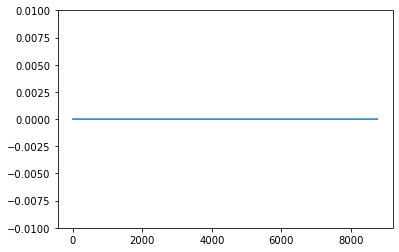

In [10]:
#indir3 = 'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ResStock\ResStock_update_20200617\scaling_factor\Other_load(using scaled_other_load KW)'
gross = pd.read_csv(os.path.join(indir2,
                                     grossloadfile.format(
                                        s=region_state_map[region]))).loc[:8759]
ax=((baseline_totals['scaled']-gross['scaled_com_kwh'].values)/baseline_totals['scaled']).plot()
ax.set_ylim([-0.01,0.01])

In [11]:
print((baseline_totals['scaled'].sum() - gross['scaled_com_kwh'].sum())/ gross['scaled_com_kwh'].sum())

0.0


(4000.0, 4200.0)

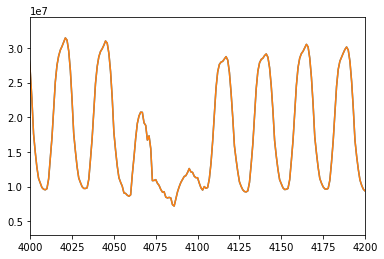

In [12]:
ax=gross['scaled_com_kwh'].plot()
baseline_totals['scaled'].plot(ax=ax)
ax.set_xlim([4000,4200])

In [13]:

(cluster_summ_res['sector']=='res').sum()

77

### Sanity check: these numbers below should mostly be order hundreds or thousands, not ones.

In [14]:

drpi

cooling     lighting  hvac_system      heating  interior_equipment  \
0     0.000000  3202.480304     0.004188   167.497295          526.295018   
1     0.000000  3194.230277     0.000000   203.099596          526.295018   
2     0.000000  3237.854317     0.000000   251.620487          526.295018   
3     0.000000  3315.769141   119.288663  1826.596517          526.295018   
4     0.000000  3647.698825   712.631241  6415.160282          532.714556   
...        ...          ...          ...          ...                 ...   
8755  0.073304  5247.131446  1234.123446  3059.831890          526.295018   
8756  0.000000  4822.978173  1006.766115  1761.040884          527.462207   
8757  0.000000  4473.234353   919.117428  1207.435268          565.222860   
8758  0.000000  3912.811872   457.442205     0.000000          573.400365   
8759  0.000000  3529.385654     0.020308     0.000000          537.195964   

      refrigeration  water_heating         total  
0               0.0       0.000000   3896.276806  
1               0.0       0.000000   3923.624891  
2               0.0       0.000000   4015.769823  
3               0.0       0.000000   5787.949338  
4               0.0     310.310150  11618.515055  
...             ...            ...           ...  
8755            0.0     786.791404  10854.246507  
8756            0.0     699.895773   8818.143152  
8757            0.0     629.936591   7794.946499  
8758            0.0     702.012857   5645.667299  
8759            0.0      89.311342   4155.913267  

[8760 rows x 8 columns]

### Sanity Check: We should have the same number of cluster input files as there are rows in the cluster_summary file, no  more and no less

In [15]:
assert (len(os.listdir(full_outdir))-1) == len(cluster_summ)

In [16]:
len(os.listdir(full_outdir))-1

438

In [17]:
len(cluster_summ)

438

In [18]:
os.listdir(full_outdir)

['AR_Texarkana.Rgnl.Webb-LargeOffice-3A.csv',
 'AR_Texarkana.Rgnl.Webb-SmallOffice-3A.csv',
 'cluster_summary.csv',
 'ind_other.csv',
 'NM_Cannon.Afb-LargeOffice-4B.csv',
 'NM_Cannon.Afb-SmallOffice-4B.csv',
 'NM_Clayton.Muni.Amos-SmallOffice-4B.csv',
 'OK_Clinton.Sherman-SecondarySchool-3B.csv',
 'OK_Clinton.Sherman-SmallOffice-3B.csv',
 'OK_Gage.Shattuck-LargeOffice-3B.csv',
 'TX_Abilene.Municipal-LargeOffice-3A.csv',
 'TX_Abilene.Municipal-LargeOffice-3B.csv',
 'TX_Abilene.Municipal-MediumOffice-3B.csv',
 'TX_Abilene.Municipal-SmallOffice-3A.csv',
 'TX_Abilene.Municipal-SmallOffice-3B.csv',
 'TX_Alice.Intl-LargeOffice-2A.csv',
 'TX_Alice.Intl-Outpatient-2A.csv',
 'TX_Alice.Intl-SmallOffice-2A.csv',
 'TX_Amarillo.Intl-FullServiceRestaurant-4B.csv',
 'TX_Amarillo.Intl-Hospital-4B.csv',
 'TX_Amarillo.Intl-LargeHotel-4B.csv',
 'TX_Amarillo.Intl-LargeOffice-4B.csv',
 'TX_Amarillo.Intl-MediumOffice-4B.csv',
 'TX_Amarillo.Intl-Outpatient-4B.csv',
 'TX_Amarillo.Intl-PrimarySchool-4B.csv',
 